<a href="https://colab.research.google.com/github/joytun-tonny/LLM_EDA/blob/main/LLM_dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Research Paper Materials/augmented_dataset.csv")



In [ ]:
print(df.shape)
print(df.columns)
df.head()

(18609, 5)
Index(['Title', 'Text', 'Date', 'Domain', 'Source'], dtype='object')


,Title,Text,Date,Domain,Source
0,William Whitehouse,William Edward Whitehouse (20 May 1859 – 12 Ja...,NaN,NaN,Wikipedia
1,Cheryl S. McWatters,Cheryl S. McWatters is professor and Father Ed...,NaN,NaN,Wikipedia
2,Lithuanian Lands Militia,The Lithuanian Lands Militia () was a military...,NaN,NaN,Wikipedia
3,Mizoram–Manipur–Kachin rain forests,The Mizoram-Manipur-Kachin rain forests is a s...,NaN,NaN,Wikipedia
4,Salesbury,Salesbury is a village and civil parish in Rib...,NaN,NaN,Wikipedia


In [ ]:
df.info()

# Check nulls
nulls = df.isnull().sum()
nulls_percent = (nulls / len(df)) * 100
print(pd.concat([nulls, nulls_percent], axis=1, keys=["Missing Count", "Missing %"]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18609 entries, 0 to 18608
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   18609 non-null  object
 1   Text    18609 non-null  object
 2   Date    5384 non-null   object
 3   Domain  10609 non-null  object
 4   Source  18609 non-null  object
dtypes: object(5)
memory usage: 727.0+ KB
        Missing Count  Missing %
Title               0   0.000000
Text                0   0.000000
Date            13225  71.067763
Domain           8000  42.989951
Source              0   0.000000


In [ ]:
# Summary Statistics
df.describe(include='all')

,Title,Text,Date,Domain,Source
count,18609,18609,5384,10609,18609
unique,14268,14280,666,7,5
top,FBR issues immovable property valuation tables...,strong>TOKYO: Tokyo stocks climbed in early tr...,8/1/2016,business,News Articles
freq,10,10,54,3078,5384


In [ ]:
# Handle Date Column Without Dropping It

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df['Has_Date'] = df['Date'].notnull()


print(df['Has_Date'].value_counts())

Has_Date
False    13225
True      5384
Name: count, dtype: int64


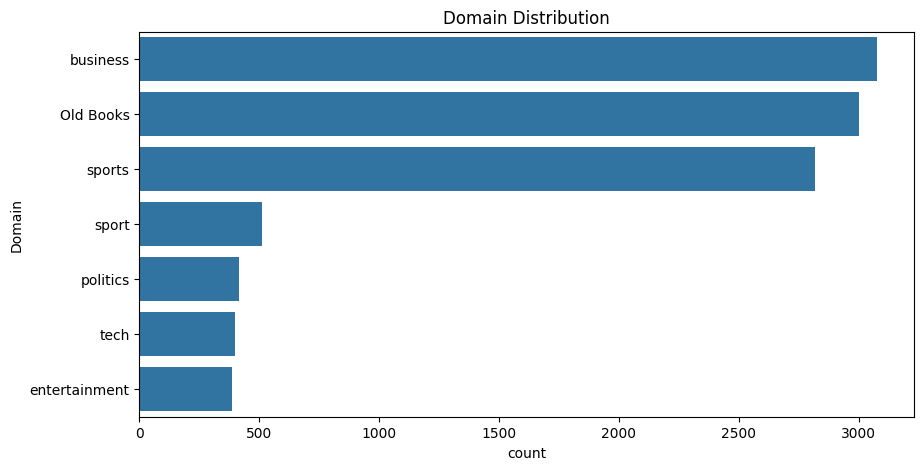

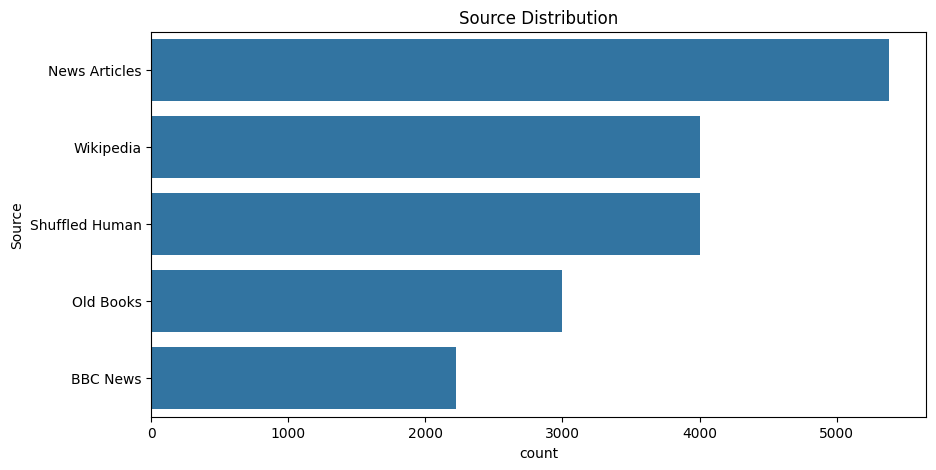

In [ ]:
# Analyze Domain and Source Columns
import matplotlib.pyplot as plt
import seaborn as sns

# Domain
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Domain', order=df['Domain'].value_counts().index)
plt.title('Domain Distribution')
plt.show()

# Source
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Source', order=df['Source'].value_counts().index)
plt.title('Source Distribution')
plt.show()

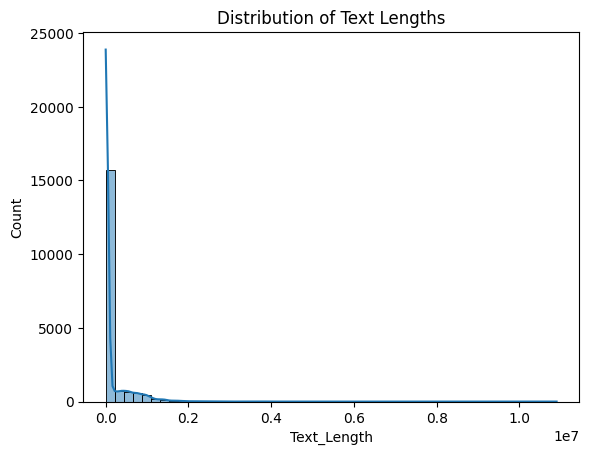

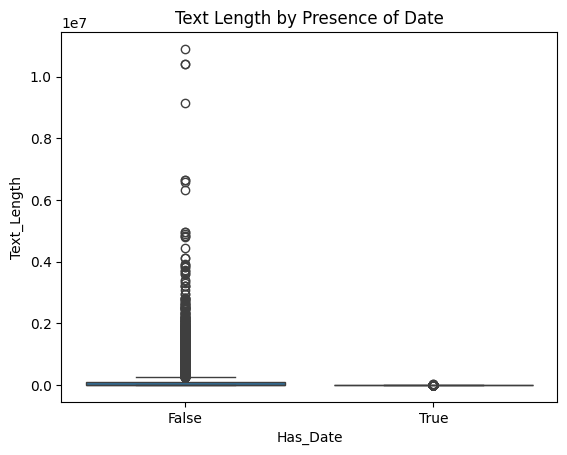

In [ ]:
# Text Length Analysis (Title and Text)
# Add text length columns
df['Title_Length'] = df['Title'].astype(str).apply(len)
df['Text_Length'] = df['Text'].astype(str).apply(len)
df['Word_Count'] = df['Text'].astype(str).apply(lambda x: len(x.split()))

# Plot distributions
sns.histplot(df['Text_Length'], bins=50, kde=True)
plt.title("Distribution of Text Lengths")
plt.show()

sns.boxplot(x='Has_Date', y='Text_Length', data=df)
plt.title("Text Length by Presence of Date")
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

start_date = df['Date'].min()
end_date = df['Date'].max()

print(f"📅 Start Date: {start_date.date()}")
print(f"📅 End Date: {end_date.date()}")

📅 Start Date: 2015-01-01
📅 End Date: 2017-03-27
